# Обратимые разностные схемы для классических нелинейных осцилляторов

Малых М.Д., 2 апр. 2024

Каф. Математического моделирования и искусственного интеллекта РУДН

## Геометрические интеграторы

* Симплектические интеграторы
* Вариационные интеграторы
* Консервативные интеграторы

$$
\frac{dx}{dt} = f(x) \to g(\hat x, x \Delta t)=0
$$

## Наследование геометрических свойств

### Пример. Задача двух тел
IRK2

In [1]:
load("fdm.sage")
dt=0.001
var("x1,y1,u1,v1,x2,y2,u2,v2,t")
r=sqrt((x1-x2)^2+(y1-y2)^2)
rho=1/r
pr1=Initial_problem([x1,y1,x2,y2,u1,v1,u2,v2],[u1,v1,u2,v2,(x2-x1)/r^3, (y2-y1)/r^3, (x1-x2)/r^3, (y1-y2)/r^3],[0,0,1,0,0,0,0,1],4)

In [34]:
pr1.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} v_{1} = -\frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} u_{2} = \frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad  \frac{d}{dt} v_{2} = \frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1
\end{aligned} \right. 


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} v_{1} = -\frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad \frac{d}{dt} u_{2} = \frac{x_{1} - x_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \quad  \frac{d}{dt} v_{2} = \frac{y_{1} - y_{2}}{{\left({\left(x_{1} - x_{2}\right)}^{2} + {\left(y_{1} - y_{2}\right)}^{2}\right)}^{\frac{3}{2}}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1
\end{aligned} \right. 
$$

In [35]:
s=irk(pr1, N=50, eps=10^-10, M=10^2)

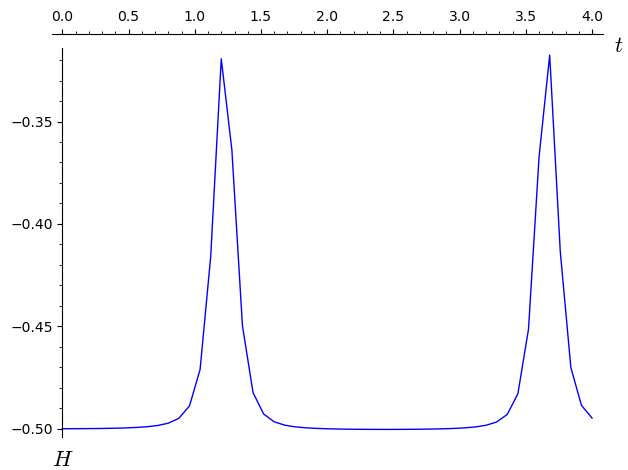

In [36]:
H=(u1^2+u2^2+v1^2+v2^2)/2 - 1/r
s.plot(t,H, axes_labels=["$t$","$H$"])

In [37]:
s.value(H,4)-s.value(H,0)

0.00519357436119816

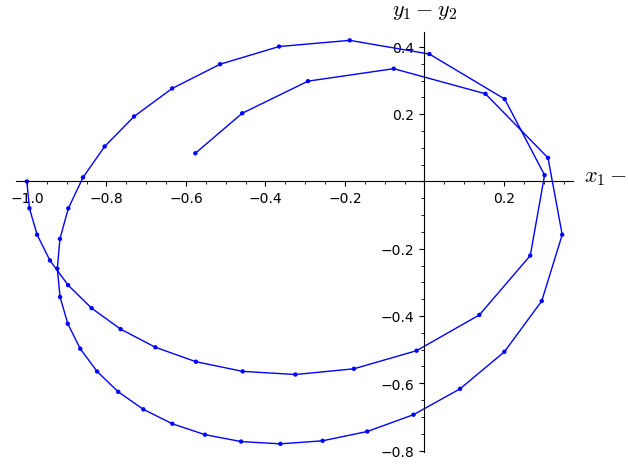

In [38]:
s.plot(x1-x2,y1-y2)+s.plot(x1-x2,y1-y2, points=True)

IRK2 с дополнительными переменными

См.: Ying Y., Baddour A., Gerdt V.P., Malykh M.D., Sevastianov L.A. On the Quadratization of the Integrals for the Many-Body Problem. // Mathematics 2021, 9, 3208. doi:10.3390/math9243208

In [39]:
load("fdm.sage")
dt=0.001
var("x1,y1,u1,v1,x2,y2,u2,v2,r,rho,t")
pr3=Initial_problem([x1,y1,x2,y2,u1,v1,u2,v2,r,rho],[u1,v1,u2,v2,(x2-x1)*rho/r^2, (y2-y1)*rho/r^2, (x1-x2)*rho/r^2, (y1-y2)*rho/r^2,1/r*((x1-x2)*(u1-u2)+(y1-y2)*(v1-v2)), -rho/r^2*((x1-x2)*(u1-u2)+(y1-y2)*(v1-v2))],[0,0,1,0,0,0,0,1,1,1],4)

In [40]:
pr3.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{1} = -\frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} u_{2} = \frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{2} = \frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} r = \frac{{\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}}{r} , \quad  \frac{d}{dt} \rho = -\frac{{\left({\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}\right)} \rho}{r^{2}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1 , \quad r (0)= 1 , \quad \rho

$$
\left \{ \begin{aligned} &
\frac{d}{dt} x_{1} = u_{1} , \quad \frac{d}{dt} y_{1} = v_{1} , \quad \frac{d}{dt} x_{2} = u_{2} , \quad \frac{d}{dt} y_{2} = v_{2} , \quad \frac{d}{dt} u_{1} = -\frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{1} = -\frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} u_{2} = \frac{\rho {\left(x_{1} - x_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} v_{2} = \frac{\rho {\left(y_{1} - y_{2}\right)}}{r^{2}} , \quad \frac{d}{dt} r = \frac{{\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}}{r} , \quad  \frac{d}{dt} \rho = -\frac{{\left({\left(u_{1} - u_{2}\right)} {\left(x_{1} - x_{2}\right)} + {\left(v_{1} - v_{2}\right)} {\left(y_{1} - y_{2}\right)}\right)} \rho}{r^{2}} , \\ &
x_{1} (0)= 0 , \quad y_{1} (0)= 0 , \quad x_{2} (0)= 1 , \quad y_{2} (0)= 0 , \quad u_{1} (0)= 0 , \quad v_{1} (0)= 0 , \quad u_{2} (0)= 0 , \quad v_{2} (0)= 1 , \quad r (0)= 1 , \quad \rho (0)= 1
\end{aligned} \right.
$$

In [41]:
s=irk(pr3, N=50, eps=10^-10, M=10^2)

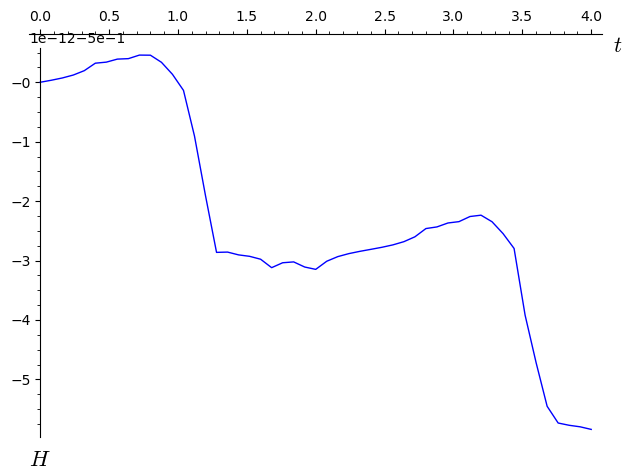

In [42]:
H=(u1^2+u2^2+v1^2+v2^2)/2 - 1/r
s.plot(t,H, axes_labels=["$t$","$H$"])

In [43]:
s.value(H,4)-s.value(H,0)

-5.84132742176280e-12

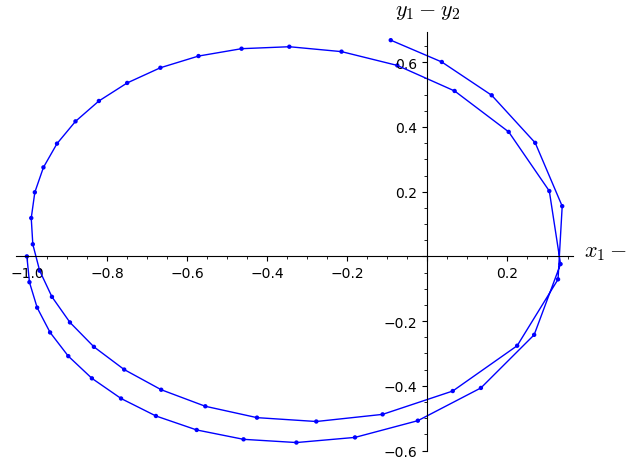

In [44]:
s.plot(x1-x2,y1-y2)+s.plot(x1-x2,y1-y2, points=True)

Проблема. Сохранение одних алгебриаческих свойств не влечет сохранение других. 

## Разностные схемы, основанные на преобразованиях Кремоны

Любая динамическая система с квадратичной правой частью 
$$
\frac{d \mathfrak x}{dt} = \mathfrak f(\mathfrak x) 
$$
может быть аппроксимирована уравнением
$$
\hat {\mathfrak x} -\mathfrak x =\mathfrak F\Delta t,
$$
которая является линейной по отношению к $\mathfrak x $ и $\hat {\mathfrak x} $.

Таким образом, $\hat {\mathfrak x} $ является рациональной функцией $\mathfrak x $ и, наоборот, $\mathfrak x $ является рациональной функцией $\hat {\mathfrak x} $.

### Пример. Вольтерра-Лотка

In [47]:
var("x,y,t,dt")
T=100
pr=Initial_problem([x,y],[x*(2-y),-y*(2-x)],[1,2],T)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x = -x {\left(y - 2\right)} , \quad  \frac{d}{dt} y = {\left(x - 2\right)} y , \\ &
x (0)= 1 , \quad y (0)= 2
\end{aligned} \right. 


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = -x {\left(y - 2\right)} , \quad  \frac{d}{dt} y = {\left(x - 2\right)} y , \\ &
x (0)= 1 , \quad y (0)= 2
\end{aligned} \right. 
$$

In [48]:
N=200
sol=cremona_scheme(pr, N=N, field=RR)

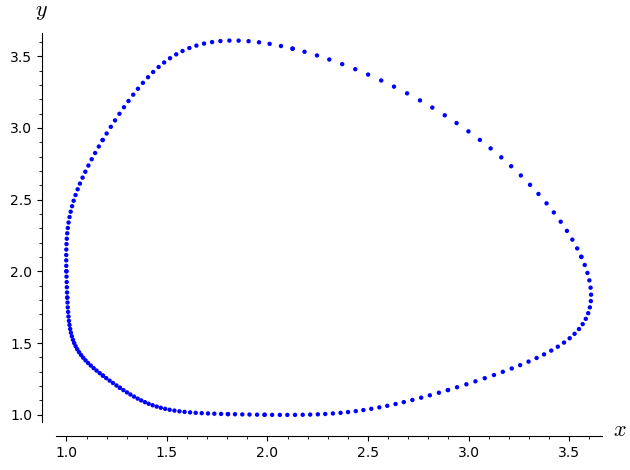

In [49]:
sol.plot(x,y,points=True)

In [50]:
sol_rk=erk(pr, N=200, field=RR)

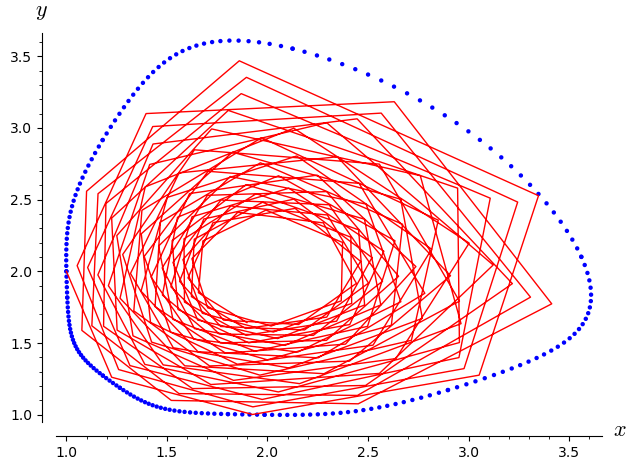

In [54]:
sol_rk.plot(x,y,color='red')+sol.plot(x,y,points=True)

### История

I have used these unconventional methods for 24 years
without quite understanding why they work so well as they
do, when they work. That is why I pray that some reader
of these notes will some day explain the methods’ behavior
to me better than I can, and perhaps improve them. -- W. Kahan.

* W. Kahan, 1993, неопубл.
* Sanz-Serna, 1994. Первая публикация
* Hirota and Kimura, 1999. Наследование интегралов для двух случаев движения волчка.
* Celledoni et al., 2016. Наследование интеграла энергии в случае гамильтоновой системы.
* Ю. Б. Сурис и др., 2019. Исследование интегральных кривых в случае одномерной гамильтновой системы. 

### Предыстория

Maps derived from the Kahan method are birational, that
is, they are elements of the Cremona group of birational automorphisms. The algebra, geometry and dynamics of this group have been studied extensively [Rerikh], although the phenomena
illustrated by the Kahan method are apparently new. -- Celledoni et al., 2015

* Эрмит, 1880-е: вся теория эллиптических функций может быть теперь изложена как раздел теории преобразований Кремоны. 
* Пенлеве, 1897: ОДУ интегрируется в абелевых функциях и прочих классических трансцендентах тогда и только тогда, когда на алгебарическом интегральном многообразии оно задает бирационльное соответствие
* Аппельрот,1902: всякая система ОДУ с полиномаильеной правой частью сводится к системе с квадратичной правой частью путем увеличения числа неизвестных (квадратизация).
* Лагутинский, 1911: метод отыскания интегральных кривых, принадлежащих заданной линейной системе

### Мои работы

* Айрян Э. А., Малых М. Д., Севастьянов Л. А. О разностных схемах, аппроксимирующих дифференциальные уравнения первого порядка и задающих проективные соответствия между слоями // Зап. научн. сем. ПОМИ. Том 468. P. 202-228.
* Баддур Али, Малых М.Д., Севастьянов Л.А. О периодических приближенных решениях динамических систем с квадратичной правой частью // Зап. научн. сем. ПОМИ, 507 (2021), 157–172
* Э. А. Айрян, М. М. Гамбарян, М. Д. Малых, Л. А. Севастьянов. О траекториях динамических систем с квадратичной правой частью, вычисленных по обратимым разностным схемам // Зап. научн. сем. ПОМИ, 2022, том 517, с. 17–35
* Э. А. Айрян, М. М. Гамбарян, М. Д. Малых, Л. А. Севастьянов. Обратимые разностные схемы для эллиптических осцилляторов // Зап. научн. сем. ПОМИ, 2023, том 528, с. 54–78
* M. Malykh, M. Gambaryan, O. Kroytor, and A. Zorin. Finite Difference Models of Dynamical Systems with Quadratic Right-Hand Side // Mathematics 2024, 12, 167.

## Бесконечно удаленные точки 

In [2]:
var("x,y,t")
pr=Initial_problem([x,y],[y,6*x^2-1],[1,2],10)
pr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = 6 \, x^{2} - 1 , \\ &
x (0)= 1 , \quad y (0)= 2
\end{aligned} \right. 


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = 6 \, x^{2} - 1 , \\ &
x (0)= 1 , \quad y (0)= 2
\end{aligned} \right. 
$$

In [3]:
dt=0.01
N=1000
pr=Initial_problem([x,y],[y,6*x^2-1],[1,2],N*dt)
s=cremona_scheme(pr, N=N, field=RR)

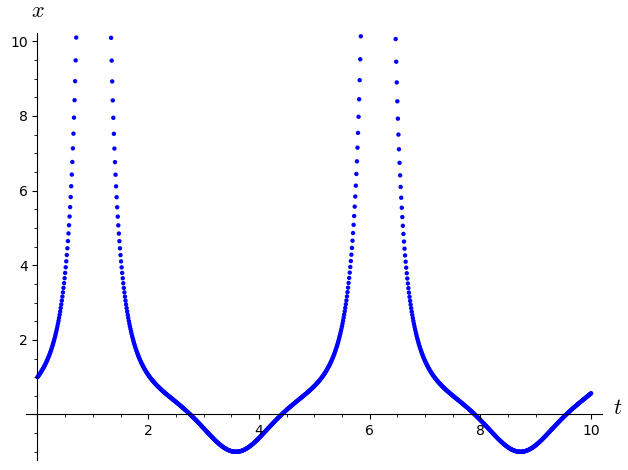

In [4]:
s.plot(t,x,points=True).show(ymin=-1,ymax=10)

## Осцилляторя Якоби

In [353]:
var("t,p,q,r")
k=1/5
pqr=Initial_problem([p,q,r],[q*r,-p*r,-k^2*p*q],[0,1,1],200)
pqr.latex()

\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{25} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. 


$$
\left \{ \begin{aligned} &
\frac{d}{dt} p = q r , \quad \frac{d}{dt} q = -p r , \quad  \frac{d}{dt} r = -\frac{1}{4} \, p q , \\ &
p (0)= 0 , \quad q (0)= 1 , \quad r (0)= 1
\end{aligned} \right. 
$$

In [354]:
sol=cremona_scheme(pqr, N=20, field=RR)

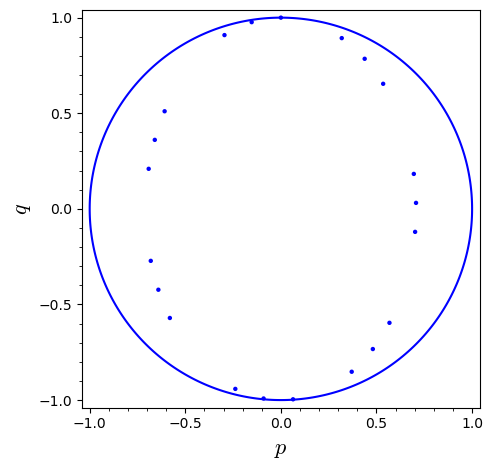

In [355]:
pl1=sol.plot(p,q, points=True)+implicit_plot(p^2+q^2==1, (p,-1,1),(q,-1,1))
pl1

### Уравнение кривой, на которой лежат точки приближенного решения

In [356]:
var("p,q,r,p0,q0,r0,t,dt,k")
pqrk=Initial_problem([p,q,r],[q*r,-p*r,-k^2*p*q],[p0,q0,r0],10)
S=cremona_scheme_general(pqrk,dt,3,ring=QQ[k])

Определитель Лагутинского для семейства
$$
ap^2+bq^2+c=0
$$

In [357]:
matrix([[(p^2).subs(i),(q^2).subs(i),1] for i in S]).det().numerator()

0

In [358]:
u=matrix([[(p^2).subs(i),(q^2).subs(i),1] for i in [S[0],S[1],[]]]).det().numerator()/dt
ZZ[p0,q0,r0,dt,k][p,q,r](u)

(p0^2*q0^4*r0^2*dt^5*k^4 + 2*p0^3*q0^3*r0*dt^4*k^4 - 2*p0*q0^5*r0*dt^4*k^4 - 2*p0*q0^3*r0^3*dt^4*k^2 - 4*p0^2*q0^4*dt^3*k^4 + 4*q0^4*r0^2*dt^3*k^2 + 8*p0^3*q0*r0*dt^2*k^2 - 8*p0*q0*r0^3*dt^2 - 16*p0^2*q0^2*dt*k^2 - 16*p0^2*r0^2*dt + 16*q0^2*r0^2*dt + 32*p0*q0*r0)*p^2 + (-p0^4*q0^2*r0^2*dt^5*k^4 - 2*p0^5*q0*r0*dt^4*k^4 + 2*p0^3*q0^3*r0*dt^4*k^4 + 2*p0^3*q0*r0^3*dt^4*k^2 + 4*p0^4*q0^2*dt^3*k^4 + 4*p0^4*r0^2*dt^3*k^2 - 8*p0*q0^3*r0*dt^2*k^2 - 8*p0*q0*r0^3*dt^2 - 16*p0^2*q0^2*dt*k^2 - 16*p0^2*r0^2*dt + 16*q0^2*r0^2*dt + 32*p0*q0*r0)*q^2 - 4*p0^4*q0^2*r0^2*dt^3*k^2 - 4*p0^2*q0^4*r0^2*dt^3*k^2 - 8*p0^5*q0*r0*dt^2*k^2 + 8*p0*q0^5*r0*dt^2*k^2 + 8*p0^3*q0*r0^3*dt^2 + 8*p0*q0^3*r0^3*dt^2 + 16*p0^4*q0^2*dt*k^2 + 16*p0^2*q0^4*dt*k^2 + 16*p0^4*r0^2*dt - 16*q0^4*r0^2*dt - 32*p0^3*q0*r0 - 32*p0*q0^3*r0

In [359]:
(ZZ[p0,q0,r0,dt,k,p,q,r](u)).factor()

(-1) * (q0*r0*dt + 2*p0) * (p0*r0*dt - 2*q0) * (p0*q0*dt*k^2 - 2*r0) * (-q0^2*dt^2*k^2*p^2 + p0^2*dt^2*k^2*q^2 + 4*p0^2 + 4*q0^2 - 4*p^2 - 4*q^2)

In [360]:
g=-q0^2*dt^2*k^2*p^2 + p0^2*dt^2*k^2*q^2 + 4*p0^2 + 4*q0^2 - 4*p^2 - 4*q^2
latex(g)

\mathit{dt}^{2} k^{2} p_{0}^{2} q^{2} - \mathit{dt}^{2} k^{2} p^{2} q_{0}^{2} - 4 \, p^{2} + 4 \, p_{0}^{2} - 4 \, q^{2} + 4 \, q_{0}^{2}

$$
\mathit{dt}^{2} k^{2} p_{0}^{2} q^{2} - \mathit{dt}^{2} k^{2} p^{2} q_{0}^{2} - 4 \, p^{2} + 4 \, p_{0}^{2} - 4 \, q^{2} + 4 \, q_{0}^{2}=0
$$

Проверка

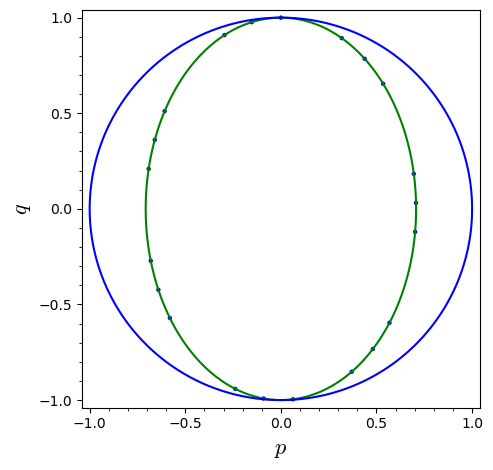

In [361]:
implicit_plot(g.subs([k==1/5, p0==0, q0==1, r0==1, dt==200/20])==0, (p,-1,1), (q,-1,1), color='green')+pl1

Интегральная кривая
$$
p^2+q^2=c_1\left(1+\frac{k^2 \Delta t^2}{4}q^2\right), \quad
k^2 p^2+r^2 = c_2 \left( 1+\frac{\Delta t^2}{4}r^2 \right).
$$

### Квадратура
$$
\int \limits_{p}^{\hat p} \frac{dp}{\sqrt{(c_1 -p^2)(c_2-k^2 p^2)}} =\Delta u (c_1,c_2, \Delta t).
$$
Берем $c_1=c_2=1$ и подбираем начальную точку на этой кривой. 

In [362]:
var("t,p,q,r")
k=1/5
dt=1/4
c1=1
c2=1
p0=0
u1=p0^2+q^2 - c1*(1+k^2*dt^2/4*q^2)
u2=k^2*p0^2+r^2 - c2*(1+dt^2/4*r^2)
S2=solve([u1,u2],[q,r])[3]
S2

[q == 40/1599*sqrt(1599), r == 8/21*sqrt(7)]

Вычисляем квадратуру на решении. 

In [363]:
du=(1/sqrt((c1-p^2)*(c2-k^2*p^2)))
T=30
N=T/dt
p0=0
t0=0
pqr=Initial_problem([p,q,r],[q*r,-p*r,-k^2*p*q],[p0,q.subs(S2),r.subs(S2)],T)
sol=cremona_scheme(pqr, N=N, field=RR)
L=[]
for [t1,p1,q1,r1] in sol.list()[1:]:
    L.append([t0, numerical_integral(du,(p0,p1))[0]])
    p0=p1
    t0=t1

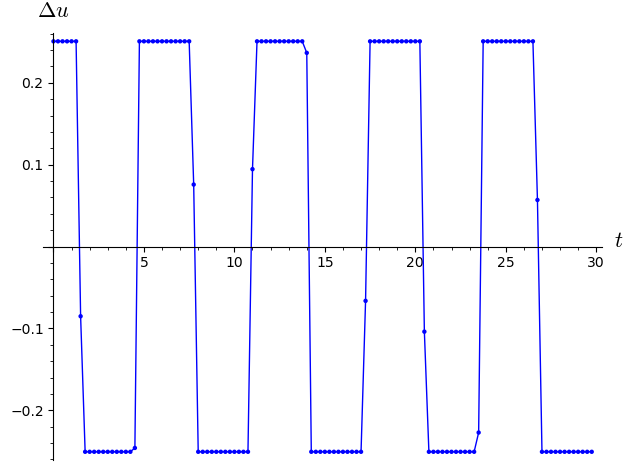

In [364]:
point(L)+line(L, axes_labels=['$t$','$\\Delta u$'])

### Период
$$
\int \limits_{p_n}^{p_{n+1}} \frac{dp}{\sqrt{(c_1 -p^2)(c_2-k^2 p^2)}} = \Delta u =\frac{N\omega}{M}
$$
Выражение $\Delta u$ через $\Delta t$:
$$
\Delta u =\int \limits_{0}^{\beta \Delta t} \frac{dp}{\sqrt{(c_1 -p^2)(c_2-k^2 p^2)}}.
$$
Отсбда при $c_1=c_2=1$ имеем
$$
\beta \Delta t=\operatorname{sn} (N\omega/M,k)
$$
Вычисляем $\beta \Delta t$, сделав 1 шаг по схеме от точки с p=0. 

In [428]:
M=5
N=2
var("dt")
c1=1
c2=1
u1=p^2+q^2 - c1*(1+k^2*dt^2/4*q^2)
u2=k^2*p^2+r^2 - c2*(1+dt^2/4*r^2)

In [429]:
S3=solve([u1.subs(p=0),u2.subs(p=0)],[q,r])[3]
S3

[q == 10*sqrt(-1/(dt^2 - 100)), r == 2*sqrt(-1/(dt^2 - 4))]

In [430]:
eqs=[pp-p==(rr*q+r*qq)*dt/2, qq-q==-(pp*r+p*rr)*dt/2, rr-r==-k^2*(pp*q+p*qq)*dt/2]
S1=solve(eqs,[pp,qq,rr])[0]
S1

[pp == (dt^2*p^3 + dt^2*p*q^2 + 25*dt^2*p*r^2 - 100*dt*q*r - 100*p)/(dt^3*p*q*r + dt^2*p^2 - dt^2*q^2 - 25*dt^2*r^2 - 100),
 qq == -(dt^2*q^3 - 25*dt^2*q*r^2 - 100*dt*p*r + (dt^2*p^2 + 100)*q)/(dt^3*p*q*r + dt^2*p^2 - dt^2*q^2 - 25*dt^2*r^2 - 100),
 rr == -(25*dt^2*r^3 - 4*dt*p*q + (dt^2*p^2 - dt^2*q^2 + 100)*r)/(dt^3*p*q*r + dt^2*p^2 - dt^2*q^2 - 25*dt^2*r^2 - 100)]

In [431]:
beta=pp.subs(S1).subs(p=0).subs(S3)/dt

In [432]:
omega=(4*elliptic_kc(k^2*c1/c2))
omega.n()

6.34747138981666

verbose 0 (3885: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 67 points.
verbose 0 (3885: plot.py, generate_plot_points) Last error message: 'Unable to compute f(3.0)'


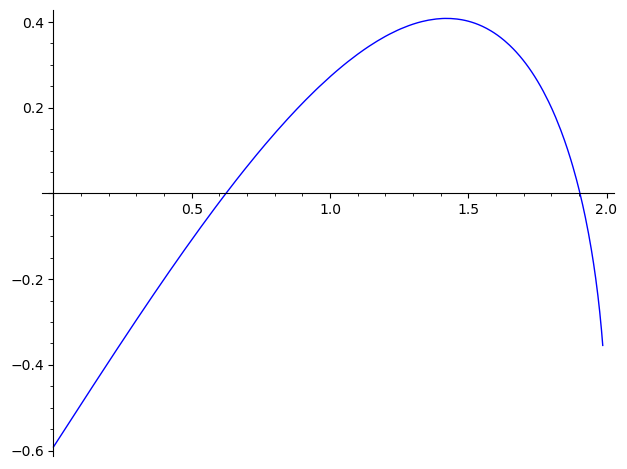

In [433]:
eq=(beta*dt - sqrt(c1)*(jacobi_sn(N*omega/M,k^2*c1/c2)))
plot(eq,(dt,0,3))

In [434]:
tau=eq.find_root(0,1.5)
tau

0.6237479450159006

In [435]:
q.subs(S3).subs(dt=tau)

1.001951002292987

In [436]:
pqr=Initial_problem([p,q,r],[q*r,-p*r,-k^2*p*q],[0,q.subs(S3).subs(dt=tau),r.subs(S3).subs(dt=tau)],10*M*tau)
sol=cremona_scheme(pqr, N=10*M, field=RR)


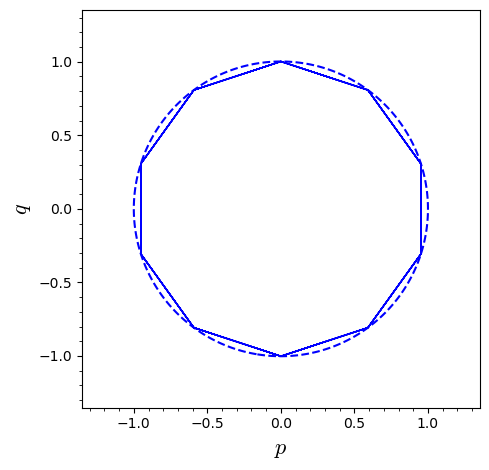

In [437]:
sol.plot(p,q,points=False)+\
implicit_plot((p^2+q^2==c1*(1+k^2*dt^2/4*q^2)).subs([dt==tau]),(p,-1.3,1.3),(q,-1.3,1.3), linestyle='--')

In [438]:
tau=eq.find_root(1.5,2)
tau

1.9039543440932576

In [439]:
pqr=Initial_problem([p,q,r],[q*r,-p*r,-k^2*p*q],[0,q.subs(S3).subs(dt=tau),r.subs(S3).subs(dt=tau)],10*M*tau)
sol=cremona_scheme(pqr, N=10*M, field=RR)


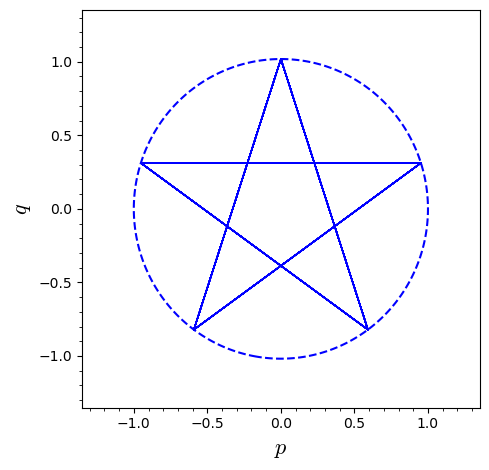

In [440]:
sol.plot(p,q,points=False)+\
implicit_plot((p^2+q^2==c1*(1+k^2*dt^2/4*q^2)).subs([dt==tau]),(p,-1.3,1.3),(q,-1.3,1.3), linestyle='--')